# Chem 277B - Fall 2024 - Homework 2 
## Logistic Regression
*Submit this notebook to bCourses to receive a credit for this assignment.*
<br>
due: **Sept 30 2024** 
<br>
**Please upload both, the .ipynb file and the corresponding .pdf**<br>
<br>
## Problem (25 P)

Write a Python script **AnalyzeMoleculesLogReg** using *def*, that performs the following analysis:<br>
<br>
1) Loading the **categorical** molecule data set *"molecular_test_gbc_cat.csv"* and *"molecular_train_gbc_cat.csv"*<br>
2) Performing a **logistic regression** using the Python libarary *statsmodels*. 

3) Evaluating the model by returning the accuracy.<br>
4) Evaluating the model by creating a **confusion matrix**. The **confusion matrix** can be created by a using a heatmap or by using the corresponding library<br>

5) Evaluating the model by plotting a histogram that shows how certain the model was in terms of assigned probabilities to the predicted classes. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#lin model
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def AnalyzeMoleculesLogReg():
###############################################################################
#load and extract the data
    
    Train     = pd.read_csv("molecular_train_gbc_cat.csv")
    Test      = pd.read_csv("molecular_test_gbc_cat.csv")
    All       = pd.concat((Train, Test), axis = 0)
    (rows, _) = Train.shape
       
###############################################################################
#scaling the data
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    AllS   = scaler.fit_transform(All.drop('label', axis = 1))
    
    #scaling returns an array, but we need a dataframe for the fit routine
    TrainS = pd.DataFrame(AllS[:rows,:], columns = Train.columns[:-1])
    TestS  = pd.DataFrame(AllS[rows:,:], columns = Train.columns[:-1])
    
###############################################################################
#performing the fit
    
    X = sm.add_constant(TrainS)       # adding intercept
    Y = pd.get_dummies(Train['label'])# label into dummies
    
    my_model = sm.GLM(Y, X, family = sm.families.Binomial()).fit()
    my_model.summary()
    
###############################################################################
#evaluating the fit
    
    predProbs   = my_model.predict(sm.add_constant(TestS))
    Pred        = np.round(predProbs).astype(int) #assigments refer to non-toxic
    predictions = ['Non-Toxic' if i==1 else 'Toxic' for i in Pred]
    
    TestY       = Test['label']
    accuracy    = 100*(TestY == predictions).sum()/len(predictions)
    print(f'accuracy = {accuracy: .2f}%')
    
    #plotting confusion matrix-----------------------------------------------------
    L = ['Non-Toxic', 'Toxic']
    
    cm   = confusion_matrix(TestY, predictions, labels = L, normalize = 'true')
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = L)
    disp.plot(cmap = 'gray')
    plt.show()
    #------------------------------------------------------------------------------
    
    #plotting entropy--------------------------------------------------------------
    PredProbs = np.vstack((predProbs, 1 - predProbs))
    
    fig, ax = plt.subplots(len(L), 1, sharex = True)
    fig.set_figheight(6)
    fig.subplots_adjust(hspace = 0.5)
    fig.suptitle('entropy')
    for i, l in enumerate(L):
        idx = [k for k, y in enumerate(TestY) if y == l]
        idx = np.array(idx)
        (value, where) = np.histogram(PredProbs[i,idx],\
                                      bins = np.arange(0,1,0.01),\
                                      density = True)
        w = 0.5*(where[1:] + where[:-1])
        ax[i].plot(w, value, 'k-')
        ax[i].set_ylabel('frequency')
        ax[i].set_title(l)
    ax[len(L)-1].set_xlabel('probability')
    plt.show()
    #------------------------------------------------------------------------------

accuracy =  84.50%


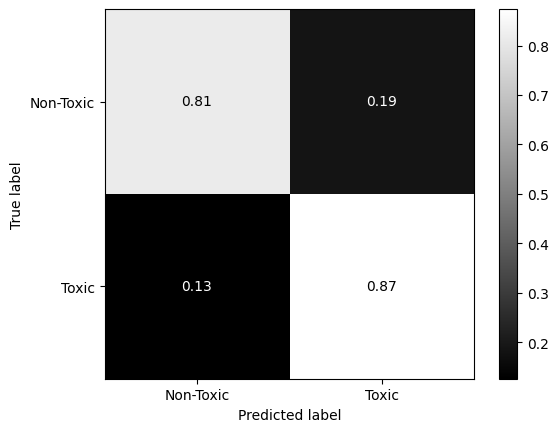

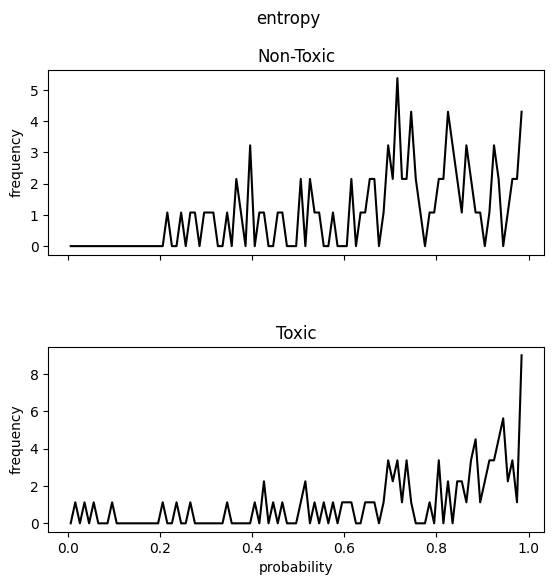

In [5]:
AnalyzeMoleculesLogReg()